# 가설검정 연습문제 (3) 
## 문제 1

유아들을 대상으로 세 가지 읽는 방법을 비교,실험하여 다음과 같은 독서평가 점수자료를 얻었다.

세 방법에 통계적으로 유의한 차이가 있는지 검정하라.




In [87]:
import pandas as pd
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner,levene, f_oneway, chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import sys
import os

## 사후분석을 위한 패키지
from statsmodels.sandbox.stats.multicomp import  MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import equal_variance_test , normality_test, independence_test,all_test


In [103]:
df = pd.read_excel("https://data.hossam.kr/E02/reading.xlsx")
df

,독서방법,점수
0,B,6
1,B,9
2,B,2
3,B,16
4,D,7
5,D,7
6,D,12
7,D,10
8,D,16
9,S,11


| 가설 | 내용 |
|---|---|
| 귀무가설($H_0$) | 독서방법에 따른 점수차이가 없다 | 
| 대립가설($H_1$) | 독서방법에 따른 점수차이가 있다 |

### 데이터 전처리

In [104]:
df['독서방법']=df['독서방법'].map({"B":1,"D":2,"S":3})
df['독서방법']=df['독서방법'].astype('category')
df

,독서방법,점수
0,1,6
1,1,9
2,1,2
3,1,16
4,2,7
5,2,7
6,2,12
7,2,10
8,2,16
9,3,11


In [105]:
## 정규성 검정
shapiro(df['점수']) ## 정규분포 따름
shapiro(df['독서방법']) ## 정규분포 안따름


ShapiroResult(statistic=0.8104491829872131, pvalue=0.006740107201039791)

In [106]:
## 등분산성 ## 등분산임 

levene(df['독서방법'],df['점수'])


LeveneResult(statistic=7.088391906283279, pvalue=0.013131620621271503)

In [107]:
## 독립성검정 
chi2_contingency(df['독서방법'],df['점수'])

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.]))

In [108]:
lm = ols("점수 ~ C(독서방법)",data=df).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(독서방법),2.0,26.464286,13.232143,0.779403,0.48244
Residual,11.0,186.750000,16.977273,NaN,NaN


In [109]:
## 정규성 검정
shapiro(df['점수']) ## 정규분포 따름

## 


ShapiroResult(statistic=0.9255002737045288, pvalue=0.26359087228775024)

### 결과해석

분산분석 결과 p값이 0.48244로  유의수준 0.05에서 독서방법에 따른 평가점수에 차이가 없다

### 사후분석 - 투키HSD

In [110]:
hsd = pairwise_tukeyhsd(df['점수'],df['독서방법'])
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,2.15,0.7237,-5.3152,9.6152,False
1,3,-1.05,0.9241,-8.5152,6.4152,False
2,3,-3.2,0.4621,-10.2383,3.8383,False


### 사후분석 결과

독서방법에 따른 점수에는 별 차이가 없다

## 문제 (2)

In [111]:
df=pd.read_excel("https://data.hossam.kr/E02/tomato.xlsx")
df

,효소함량,모종성장
0,0,10.8
1,0,9.1
2,0,13.5
3,0,9.2
4,1000,11.1
5,1000,11.2
6,1000,8.2
7,1000,11.3
8,5000,5.4
9,5000,4.6


### 데이터 전처리

In [102]:
df['효소함량'] = df['효소함량'].map({0:1,1000:2,5000:3,10000:4})
df['효소함량']=df['효소함량'].astype("category")

df.dtypes

효소함량    category
모종성장     float64
dtype: object

### 정규성 & 등분산성 & 독립성 검정

In [113]:
## 정규성 
shapiro(df['모`종성장'])` ## 정규분포 따름
shapiro(df['효소함량']) ## 정규분포 안따름


ShapiroResult(statistic=0.801868736743927, pvalue=0.0028839532751590014)

In [117]:
### 등분산성 
levene(df['모종성장'],df['효소함량'])

LeveneResult(statistic=43.17322118159114, pvalue=2.8633308047981743e-07)

In [116]:
## 독립성 

chi2_contingency(df['모종성장'],df['효소함량'])

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([10.8,  9.1, 13.5,  9.2, 11.1, 11.2,  8.2, 11.3,  5.4,  4.6,  7.4,
        5. ,  5.8,  5.3,  3.2,  7.5]))

In [114]:
df

,효소함량,모종성장
0,0,10.8
1,0,9.1
2,0,13.5
3,0,9.2
4,1000,11.1
5,1000,11.2
6,1000,8.2
7,1000,11.3
8,5000,5.4
9,5000,4.6


### 분산분석 실시


In [25]:
lm  = ols("모종성장 ~ C(효소함량)",data=df).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(효소함량),3.0,101.1275,33.709167,12.085748,0.000615
Residual,12.0,33.4700,2.789167,NaN,NaN


### 결과 해석

p값이 0.000615인 것을 바탕으로 효소함량에 따라 모종성장의 차이가 있다고 유의수준 0.05에서 결론을 내릴 수 있다

### 사후분석 - 투키의 HSD 


In [28]:
hsd = pairwise_tukeyhsd(df['모종성장'],df['효소함량'])

hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.2,0.9982,-3.706,3.306,False
0,2,-5.05,0.0051,-8.556,-1.544,True
0,3,-5.2,0.0041,-8.706,-1.694,True
1,2,-4.85,0.0069,-8.356,-1.344,True
1,3,-5.0,0.0055,-8.506,-1.494,True
2,3,-0.15,0.9992,-3.656,3.356,False


### 사후분석 결과

효소함량이 0-2, 0-3, 1-2, 1-3, 간 모종성장에는 통계적으로 유의한 차이가 있지만 0과 1 그리고 2와 3 사이에는 별 차이가 없다

## 문제(3)

두 가지 교육방법을 비교하기 위하여 능력이 비슷한 고등학교 학생 22명을 추출하고, 11명씩 두 집단으로 나누어 한 학기 동안 각각의 교육방법으로 교육시킨 후 치른 학기말 시험 성적이 다음과 같다.

이 자료를 이용하여 두 가지 교육방법에 대한 국어와 영어의 효과가 서로 다르다고 할 수 있는지 검정하라. (분석 목적에 맞는 데이터 재배치 과정이 필요합니다.)

In [38]:
df=pd.read_excel("https://data.hossam.kr/E02/edu.xlsx")
df

,교육방법,국어,영어
0,1,65,82
1,1,87,79
2,1,73,85
3,1,79,60
4,1,81,65
5,1,69,70
6,1,55,79
7,1,76,80
8,1,77,76
9,1,70,90


In [39]:
df.dtypes

교육방법    int64
국어      int64
영어      int64
dtype: object

### 분산분석의 조건 충족 여부 검정 : 정규성 & 등분산성 & 독립성


In [41]:
## 정규성 검정
## 국어 -> 정규성 따름
shapiro(df['국어'])
## 영어 -> 정규성 따름
shapiro(df['영어'])


ShapiroResult(statistic=0.9534264206886292, pvalue=0.3686617612838745)

In [42]:
## 등분산성 검정
bartlett(df['국어'],df['영어'])
## 등분산임


BartlettResult(statistic=0.2047094913590135, pvalue=0.650946036495065)

In [43]:
## 독립성 검정
chi2_contingency(df[['국어','영어']])
## 영어와 국어는 서로 독ㄹ비이다. 

Chi2ContingencyResult(statistic=24.078967532670763, pvalue=0.2892480693747032, dof=21, expected_freq=array([[73.43577046, 73.56422954],
       [82.92746869, 83.07253131],
       [78.93096417, 79.06903583],
       [69.43926595, 69.56073405],
       [72.9362074 , 73.0637926 ],
       [69.43926595, 69.56073405],
       [66.94145063, 67.05854937],
       [77.93183804, 78.06816196],
       [76.43314885, 76.56685115],
       [79.9300903 , 80.0699097 ],
       [77.93183804, 78.06816196],
       [73.43577046, 73.56422954],
       [71.93708127, 72.06291873],
       [87.92309933, 88.07690067],
       [82.92746869, 83.07253131],
       [65.9423245 , 66.0576755 ],
       [71.93708127, 72.06291873],
       [86.42441014, 86.57558986],
       [90.42091465, 90.57908535],
       [86.42441014, 86.57558986],
       [84.92572094, 85.07427906],
       [86.42441014, 86.57558986]]))

### 데이터 재배치 필요

In [50]:
df

,교육방법,국어,영어
0,1,65,82
1,1,87,79
2,1,73,85
3,1,79,60
4,1,81,65
5,1,69,70
6,1,55,79
7,1,76,80
8,1,77,76
9,1,70,90


In [63]:
first = df.loc[df['교육방법']==1,:]
first = first[['국어','영어']].melt(var_name="과목",value_name="점수")
first['교육방법'] = 1
new_col = ['교육방법','과목','점수']
first=first[new_col]

second = df.loc[df['교육방법']==2,:]
second = second[['국어','영어']].melt(var_name="과목",value_name="점수")
second['교육방법'] = 2
new_col = ['교육방법','과목','점수']
second=second[new_col]
second
new_df = pd.concat([first,second])


In [64]:
new_df

,교육방법,과목,점수
0,1,국어,65
1,1,국어,87
2,1,국어,73
3,1,국어,79
4,1,국어,81
5,1,국어,69
6,1,국어,55
7,1,국어,76
8,1,국어,77
9,1,국어,70


### 탐색적 데이터 분석

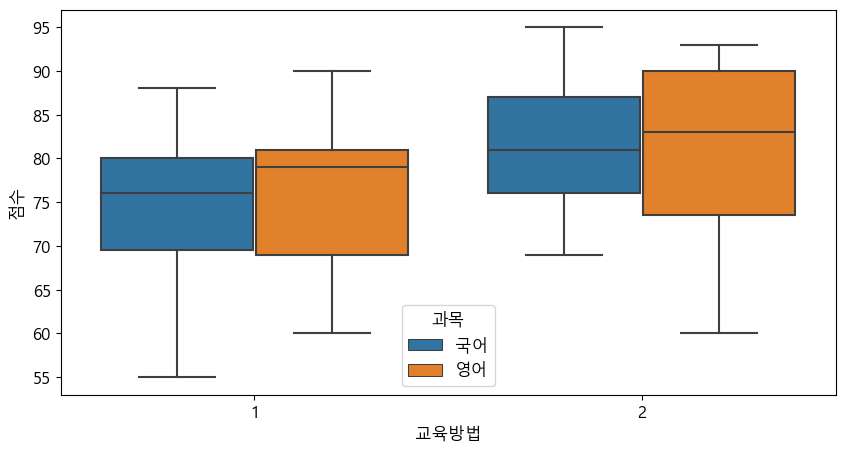

In [66]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

plt.figure()
sb.boxplot(data = new_df, x='교육방법',y ='점수',hue = '과목' )
plt.show()
plt.close()

### 데이터 전처리

In [67]:
new_df

,교육방법,과목,점수
0,1,국어,65
1,1,국어,87
2,1,국어,73
3,1,국어,79
4,1,국어,81
5,1,국어,69
6,1,국어,55
7,1,국어,76
8,1,국어,77
9,1,국어,70


In [72]:
df2 = new_df.copy()
df2['과목']=new_df['과목'].map({'국어':0,"영어":1})
df2['교육방법'] = df2['교육방법'].astype('category')
df2['과목'] =df2['과목'].astype('category')
df2

,교육방법,과목,점수
0,1,0,65
1,1,0,87
2,1,0,73
3,1,0,79
4,1,0,81
5,1,0,69
6,1,0,55
7,1,0,76
8,1,0,77
9,1,0,70


### 이원분산분석 수행


In [71]:
model = ols("점수~ C(교육방법)*C(과목)",data=df2).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(교육방법),1.0,355.113636,355.113636,3.845870,0.056857
C(과목),1.0,0.204545,0.204545,0.002215,0.962695
C(교육방법):C(과목),1.0,14.204545,14.204545,0.153835,0.696979
Residual,40.0,3693.454545,92.336364,NaN,NaN


### 결과분석 


p값이 0.05의 유의수준에서 0.05보다 크기 떄문에 차이가 없다고 결론을 내릴 수 있다. 또한 점수에 차이가 없다고 판단되기 떄문에 사후검정 x 